In [ ]:
# for data reading and data manipulation
import numpy as np
import pandas as pd
import statistics as st

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for model creation and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("/content/train.csv")
pd.set_option("display.max_columns", None)
df.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no
45210,37,entrepreneur,married,secondary,cellular,17,nov,361,2,other,no


In [ ]:
df.shape

(45211, 11)

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [ ]:
df.duplicated().sum()   

6

In [ ]:
df = df.drop_duplicates().reset_index(drop=True)

In [ ]:
df.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
45200,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45201,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45202,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45203,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no
45204,37,entrepreneur,married,secondary,cellular,17,nov,361,2,other,no


In [ ]:
df.rename(columns = {'y':'insurance_status'}, inplace = True)

In [ ]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,insurance_status
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45200,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45201,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45202,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45203,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45205.0,40.937087,10.619130,18.0,33.0,39.0,48.0,95.0
day,45205.0,15.806880,8.322340,1.0,8.0,16.0,21.0,31.0
dur,45205.0,258.183055,257.538504,0.0,103.0,180.0,319.0,4918.0
num_calls,45205.0,2.763898,3.098189,1.0,1.0,2.0,3.0,63.0


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'insurance_status'],
      dtype='object')

In [ ]:
pd.DataFrame(df.dtypes.value_counts()).T

,object,int64
0,7,4


In [ ]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['age', 'day', 'dur', 'num_calls']

In [ ]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['job',
 'marital',
 'education_qual',
 'call_type',
 'mon',
 'prev_outcome',
 'insurance_status']

In [ ]:
for i in object_data_cols:
  print(f'Column "{i}" is divided into "{len(df[i].value_counts())}" categories.')

Column "job" is divided into "12" categories.
Column "marital" is divided into "3" categories.
Column "education_qual" is divided into "4" categories.
Column "call_type" is divided into "3" categories.
Column "mon" is divided into "12" categories.
Column "prev_outcome" is divided into "4" categories.
Column "insurance_status" is divided into "2" categories.


In [ ]:
df['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
df['marital'].value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [ ]:
df['education_qual'].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [ ]:
df['call_type'].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [ ]:
df['prev_outcome'].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [ ]:
df['insurance_status'].value_counts()

no     39916
yes     5289
Name: insurance_status, dtype: int64

In [ ]:
target_counts = df["insurance_status"].value_counts()
print("Class No: ", target_counts[0])
print("Class Yes: ", target_counts[1])
print("The percentage of data where insurance is not given:", ((df["insurance_status"]=='no').sum()/df.shape[0]*100))

Class No:  39916
Class Yes:  5289
The percentage of data where insurance is not given: 88.29996681782988


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Countplot of targrt variable')

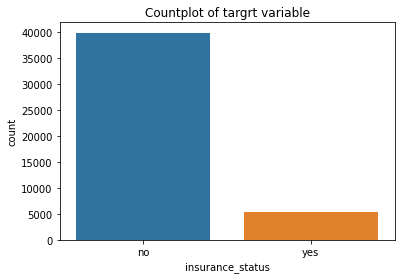

In [ ]:
sns.countplot(df['insurance_status'])
plt.title("Countplot of targrt variable")

In [ ]:
df['age'][0]

58

In [ ]:
df['age'] = df['age'].astype('int64')

In [ ]:
df['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [ ]:
len(df['age'].unique())

77

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'visualising outliers')

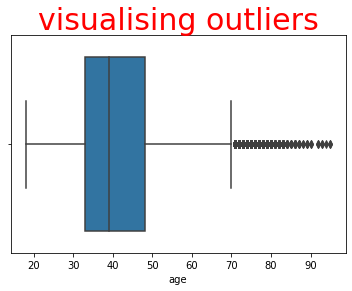

In [ ]:
sns.boxplot('age', data = df)
plt.title('visualising outliers', color = 'r', size = 30)

In [ ]:
percentile25 = df['age'].quantile(0.25)
percentile75 = df['age'].quantile(0.75)
iqr = percentile75-percentile25
print(iqr)
print(percentile25)
print(percentile75)

15.0
33.0
48.0


In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

70.5
10.5


In [ ]:
df[df['age'] < lower_limit]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,insurance_status


In [ ]:
df[df['age']>71]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,insurance_status
29152,83,retired,married,primary,telephone,2,feb,912,1,unknown,no
29255,75,retired,divorced,primary,cellular,2,feb,294,1,unknown,no
29257,75,retired,married,primary,cellular,2,feb,149,1,unknown,no
29316,83,retired,married,tertiary,cellular,2,feb,283,2,unknown,no
29859,75,retired,divorced,primary,cellular,4,feb,136,3,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...
45112,78,retired,married,primary,cellular,26,oct,150,1,other,no
45135,77,unknown,married,unknown,telephone,8,nov,207,1,success,no
45185,75,retired,divorced,tertiary,cellular,16,nov,262,1,failure,yes
45198,73,retired,married,secondary,cellular,17,nov,300,1,failure,yes


In [ ]:
(df['age']>71).sum()

433

In [ ]:
(df['age']<71).sum()

44718

In [ ]:
df_age = df[df['age']>71]
print((df_age['insurance_status']=='yes').sum())
print((df_age['insurance_status']=='no').sum())

193
240


In [ ]:
print(((df_age['insurance_status']=='yes').sum()/433)*100)
print(((df_age['insurance_status']=='no').sum()/433)*100)

44.57274826789838
55.42725173210161


In [ ]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
(df['job']=='unknown').sum()

288

In [ ]:
df[df['job']=='unknown']

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,insurance_status
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
216,47,unknown,married,unknown,unknown,5,may,338,2,unknown,no
354,59,unknown,divorced,unknown,unknown,5,may,347,3,unknown,no
876,37,unknown,single,unknown,unknown,7,may,131,1,unknown,no
1072,29,unknown,single,primary,unknown,7,may,50,2,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
44708,45,unknown,married,tertiary,cellular,7,sep,314,1,unknown,yes
44736,64,unknown,married,unknown,telephone,9,sep,378,4,unknown,no
44964,28,unknown,single,unknown,cellular,11,oct,450,1,success,yes
45135,77,unknown,married,unknown,telephone,8,nov,207,1,success,no


In [ ]:

print("The percentage of unknown data is:", ((df['job']=='unknown').sum()/df.shape[0])*100)

The percentage of unknown data is: 0.6370976661873686


In [ ]:
df = df.drop(df[df['job']=='unknown'].index).reset_index(drop=True)

In [ ]:
df.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,insurance_status
44912,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
44913,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
44914,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
44915,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no
44916,37,entrepreneur,married,secondary,cellular,17,nov,361,2,other,no


In [ ]:
print("Now the dataset has {} rows and {} columns after dropping unknown values in job".format(df.shape[0], df.shape[1]))

Now the dataset has 44917 rows and 11 columns after dropping unknown values in job


In [ ]:
df['job'].replace("admin.","admin",inplace=True)

In [ ]:
df['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin            5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

In [ ]:
df['marital'].isnull().sum()

0

In [ ]:
df['marital'].value_counts()

married     27007
single      12720
divorced     5190
Name: marital, dtype: int64

In [ ]:
df['education_qual'].isnull().sum()

0

In [ ]:
df['education_qual'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
df['education_qual'].value_counts()

secondary    23128
tertiary     13260
primary       6799
unknown       1730
Name: education_qual, dtype: int64

In [ ]:
print("The percentage of unknown data is:", ((df['education_qual']=='unknown').sum()/df.shape[0])*100)

The percentage of unknown data is: 3.8515484115145715


In [ ]:
df = df.drop(df[df['education_qual']=='unknown'].index).reset_index(drop=True)

In [ ]:
df.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,insurance_status
43182,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
43183,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
43184,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
43185,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no
43186,37,entrepreneur,married,secondary,cellular,17,nov,361,2,other,no


In [ ]:
df['education_qual'].value_counts()

secondary    23128
tertiary     13260
primary       6799
Name: education_qual, dtype: int64

In [ ]:
print("Now the dataset has {} rows and {} columns after dropping unknown values in educational qualifications".format(df.shape[0], df.shape[1]))

Now the dataset has 43187 rows and 11 columns after dropping unknown values in educational qualifications


In [ ]:
df['call_type'].value_counts()

cellular     28210
unknown      12283
telephone     2694
Name: call_type, dtype: int64

In [ ]:
df['call_type'].isnull().sum()

0

In [ ]:
print("The percentage of unknown data is:", ((df['call_type']=='unknown').sum()/df.shape[0])*100)

The percentage of unknown data is: 28.441429133767105


In [ ]:
df.drop(['call_type'], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'day', 'mon', 'dur',
       'num_calls', 'prev_outcome', 'insurance_status'],
      dtype='object')

In [ ]:
df['day'].isnull().sum()

0

In [ ]:
df['day'][0]

5

In [ ]:
df['day'] = df['day'].astype('int64')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Visualising Outliers')

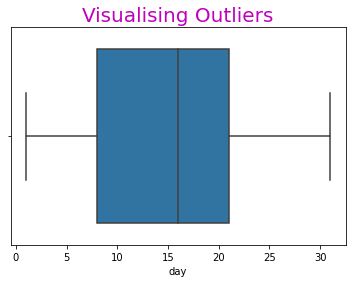

In [ ]:
sns.boxplot('day', data = df)
plt.title("Visualising Outliers", color = 'm', size = 20)

In [ ]:
df['mon'].isnull().sum()

0

In [ ]:
df['mon'][0]

'may'

In [ ]:
df['mon'].value_counts()

may    13191
jul     6600
aug     6035
jun     4978
nov     3842
apr     2820
feb     2533
jan     1318
oct      690
sep      532
mar      448
dec      200
Name: mon, dtype: int64

In [ ]:
df['dur'].isnull().sum()

0

In [ ]:
df['dur'][0]

261

In [ ]:
(df['dur']==0).sum()

3

In [ ]:
print("Minimum duration of call is:", df['dur'].min(), 'sec')
print("Maximum duration of call is:", df['dur'].max(), 'sec')

Minimum duration of call is: 0 sec
Maximum duration of call is: 4918 sec


In [ ]:
df['dur'].value_counts()

124     176
90      172
89      172
114     172
122     169
       ... 
1327      1
1331      1
1608      1
1833      1
1556      1
Name: dur, Length: 1558, dtype: int64

In [ ]:
df['dur'].describe()

count    43187.000000
mean       258.344340
std        258.173244
min          0.000000
25%        103.000000
50%        180.000000
75%        318.000000
max       4918.000000
Name: dur, dtype: float64

In [ ]:
percentile25 = df['dur'].quantile(0.25)
percentile75 = df['dur'].quantile(0.75)
iqr = percentile75 - percentile25
print(iqr)
print(percentile25)
print(percentile75)

215.0
103.0
318.0


In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

640.5
-219.5


In [ ]:
df[df['dur']>upper_limit]

,age,job,marital,education_qual,day,mon,dur,num_calls,prev_outcome,insurance_status
33,53,technician,married,secondary,5,may,1666,1,unknown,no
38,54,retired,married,secondary,5,may,1492,1,unknown,no
47,42,admin,single,secondary,5,may,787,1,unknown,no
51,46,services,married,primary,5,may,1778,1,unknown,no
53,53,technician,divorced,secondary,5,may,812,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...
43105,27,blue-collar,single,primary,26,oct,701,2,unknown,yes
43175,34,blue-collar,single,secondary,16,nov,1166,3,other,no
43176,38,technician,married,secondary,16,nov,1556,4,unknown,yes
43182,51,technician,married,tertiary,17,nov,977,3,unknown,yes


In [ ]:
df[df['dur']<lower_limit]

,age,job,marital,education_qual,day,mon,dur,num_calls,prev_outcome,insurance_status


In [ ]:
len(df[df['dur']>upper_limit])

3124

In [ ]:
df_high_dur = df[df['dur']>upper_limit]
print((df_high_dur['insurance_status']=='yes').sum())
print((df_high_dur['insurance_status']=='no').sum())

1600
1524


In [ ]:
print((df_high_dur['insurance_status']=='yes').sum()/3124)
print((df_high_dur['insurance_status']=='no').sum()/3124)

0.5121638924455826
0.4878361075544174


In [ ]:
df['num_calls'].isnull().sum()

0

In [ ]:
df['num_calls'].unique()

array([ 1,  2,  3,  5,  4,  7,  8,  6,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 41, 26, 28, 55, 50, 38, 23, 20,
       29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [ ]:
df['num_calls'].describe()

count    43187.000000
mean         2.758237
std          3.064160
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         58.000000
Name: num_calls, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Visualising outliers')

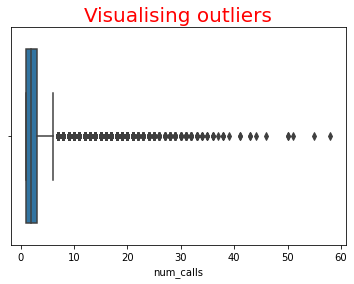

In [ ]:
sns.boxplot(df['num_calls'], data = df)
plt.title('Visualising outliers', color = 'r', size = 20)

In [ ]:
percentile25 = df['num_calls'].quantile(0.25)
percentile75 = df['num_calls'].quantile(0.75)
iqr = percentile75 - percentile25
print(iqr)
print(percentile25)
print(percentile75)

2.0
1.0
3.0


In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

6.0
-2.0


In [ ]:
df[df['num_calls'] < lower_limit]

,age,job,marital,education_qual,day,mon,dur,num_calls,prev_outcome,insurance_status


In [ ]:
df[df['num_calls'] > upper_limit]

,age,job,marital,education_qual,day,mon,dur,num_calls,prev_outcome,insurance_status
679,59,services,married,secondary,6,may,250,7,unknown,no
701,30,admin,married,secondary,7,may,172,8,unknown,no
822,27,services,single,secondary,7,may,388,7,unknown,no
1008,43,admin,married,tertiary,7,may,244,7,unknown,no
1278,37,admin,married,primary,8,may,161,8,unknown,no
...,...,...,...,...,...,...,...,...,...,...
42676,25,technician,single,secondary,2,sep,206,7,other,no
42690,27,self-employed,single,tertiary,3,sep,543,9,failure,no
42772,37,services,single,tertiary,13,sep,323,9,other,yes
42878,38,management,married,tertiary,24,sep,246,12,failure,no


In [ ]:
a = len(df[df['num_calls']>upper_limit])
df_high_calls = df[df['num_calls'] > upper_limit]
b = (df_high_calls['insurance_status']=='yes').sum()
c = (df_high_calls['insurance_status']=='no').sum()
print(b)
print(c)

153
2747


In [ ]:
print((b/a)*100) #yes
print((c/a)*100) #no

5.275862068965517
94.72413793103448


In [ ]:
df['prev_outcome'].isnull().sum()

0

In [ ]:
df['prev_outcome'].value_counts()

unknown    35280
failure     4709
other       1774
success     1424
Name: prev_outcome, dtype: int64

In [ ]:
df['prev_outcome'][0]

'unknown'

In [ ]:
print("The percentage of unknown data is:", ((df['prev_outcome']=='unknown').sum()/df.shape[0])*100)

The percentage of unknown data is: 81.69124968161715


In [ ]:
df.drop(['prev_outcome'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'day', 'mon', 'dur',
       'num_calls', 'insurance_status'],
      dtype='object')

# **EDA**


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


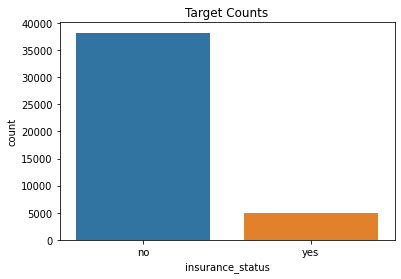

In [ ]:
sns.countplot('insurance_status', data = df)
plt.title('Target Counts')
plt.show()

In [ ]:
df_ins_yes = df[df['insurance_status']=='yes']
df_ins_no = df[df['insurance_status']=='no']

In [ ]:
def feature(feature):
  plt.subplot(2,2,1)
  sns.countplot(df[feature],order = df[feature].value_counts().index[::-1])
  plt.title("Countplot of "+ feature,size=15)
  plt.xticks(rotation=40)
  plt.subplot(2,2,2)
  sns.countplot(x=feature,hue='insurance_status',data=df,order=df[feature].value_counts().index[::-1])
  plt.title("Distribution of "+feature,size=15)
  plt.xticks(rotation=40)
  plt.subplot(2,2,3)
  sns.countplot(df_ins_yes[feature],order=df_ins_yes[feature].value_counts().index[::-1])
  plt.title(feature + " vs (target variable==yes)",size=15)
  plt.xticks(rotation=40)
  plt.subplot(2,2,4)  
  sns.countplot(df_ins_no[feature],order=df_ins_no[feature].value_counts().index[::-1])
  plt.title(feature + " vs (target variable==no)",size=15)
  plt.xticks(rotation=40)
  plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


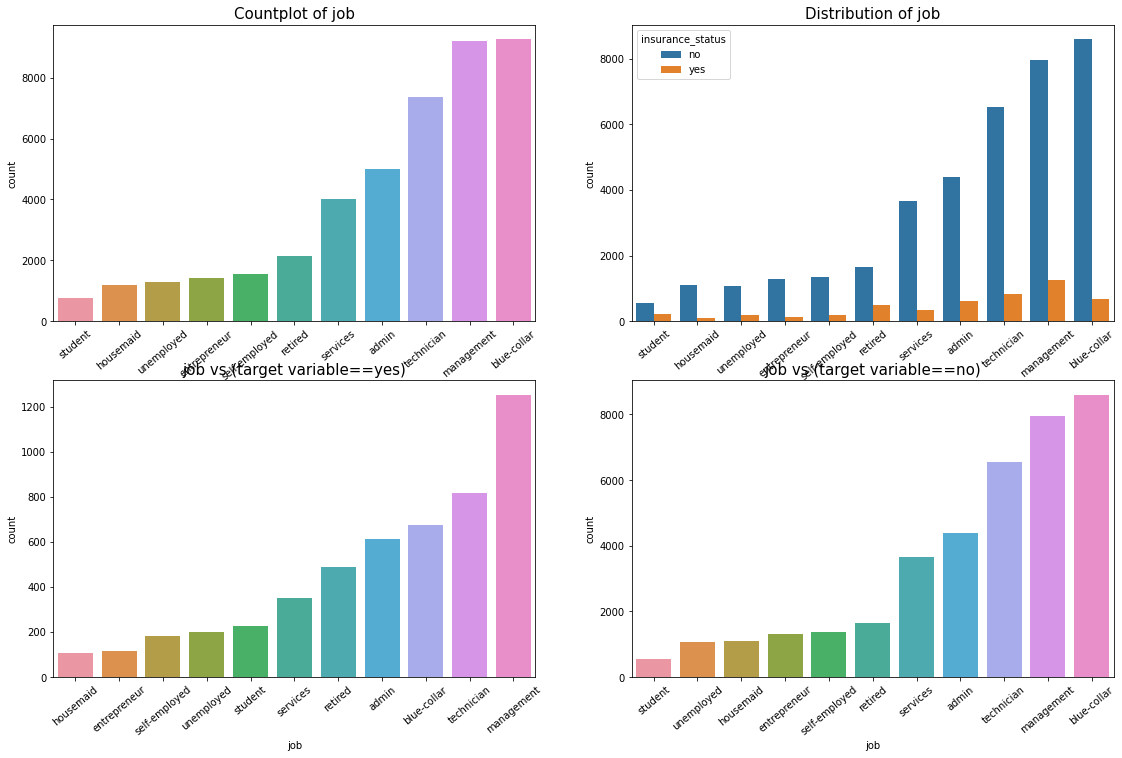

In [ ]:
plt.figure(figsize=(19,12))
feature("job")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


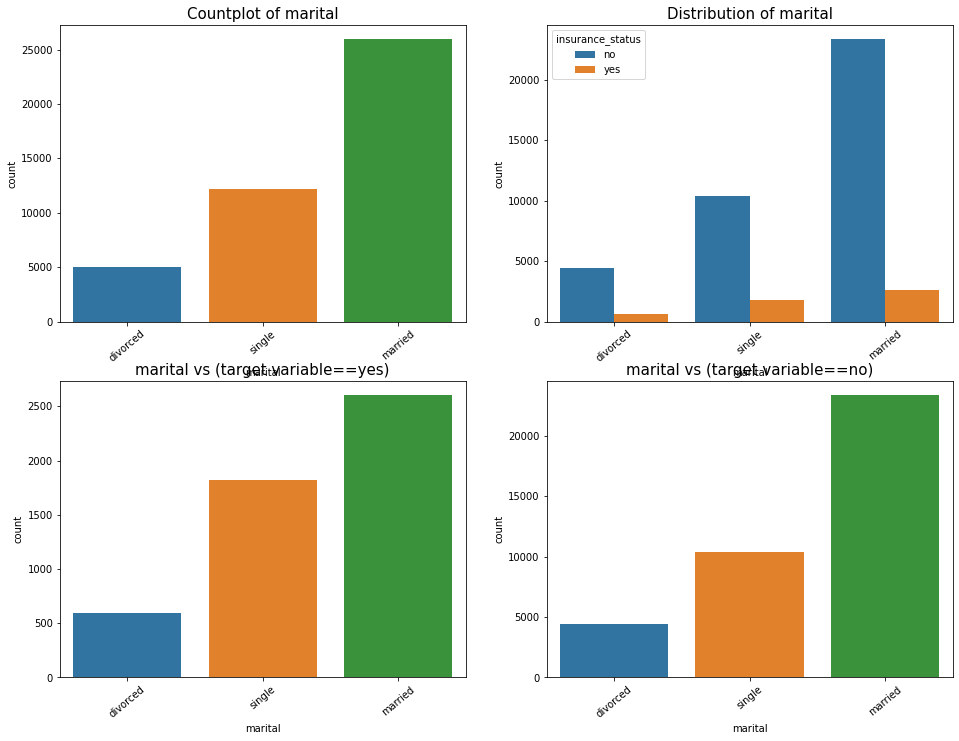

In [ ]:
plt.figure(figsize=(16,12))
feature("marital")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


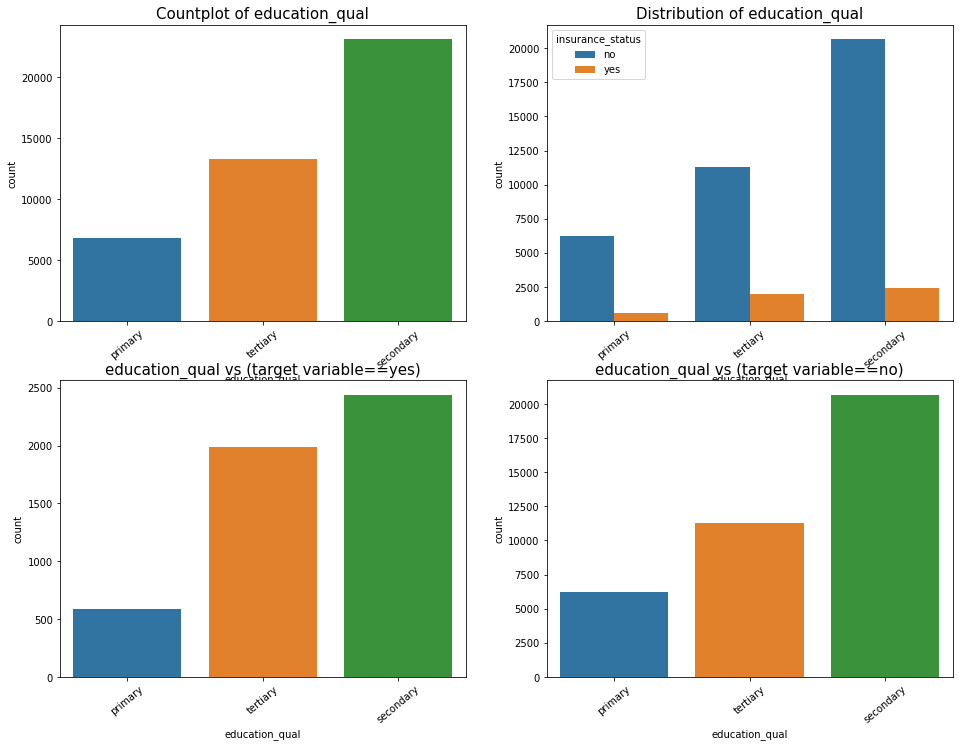

In [ ]:
plt.figure(figsize=(16,12))
feature("education_qual")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


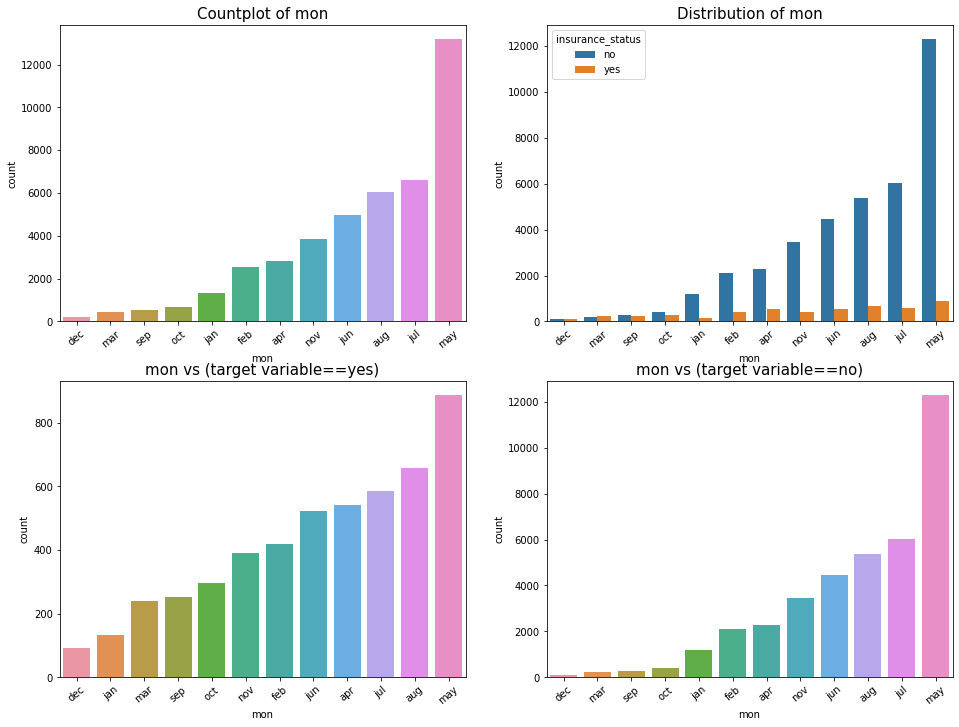

In [ ]:
plt.figure(figsize=(16,12))
feature("mon")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


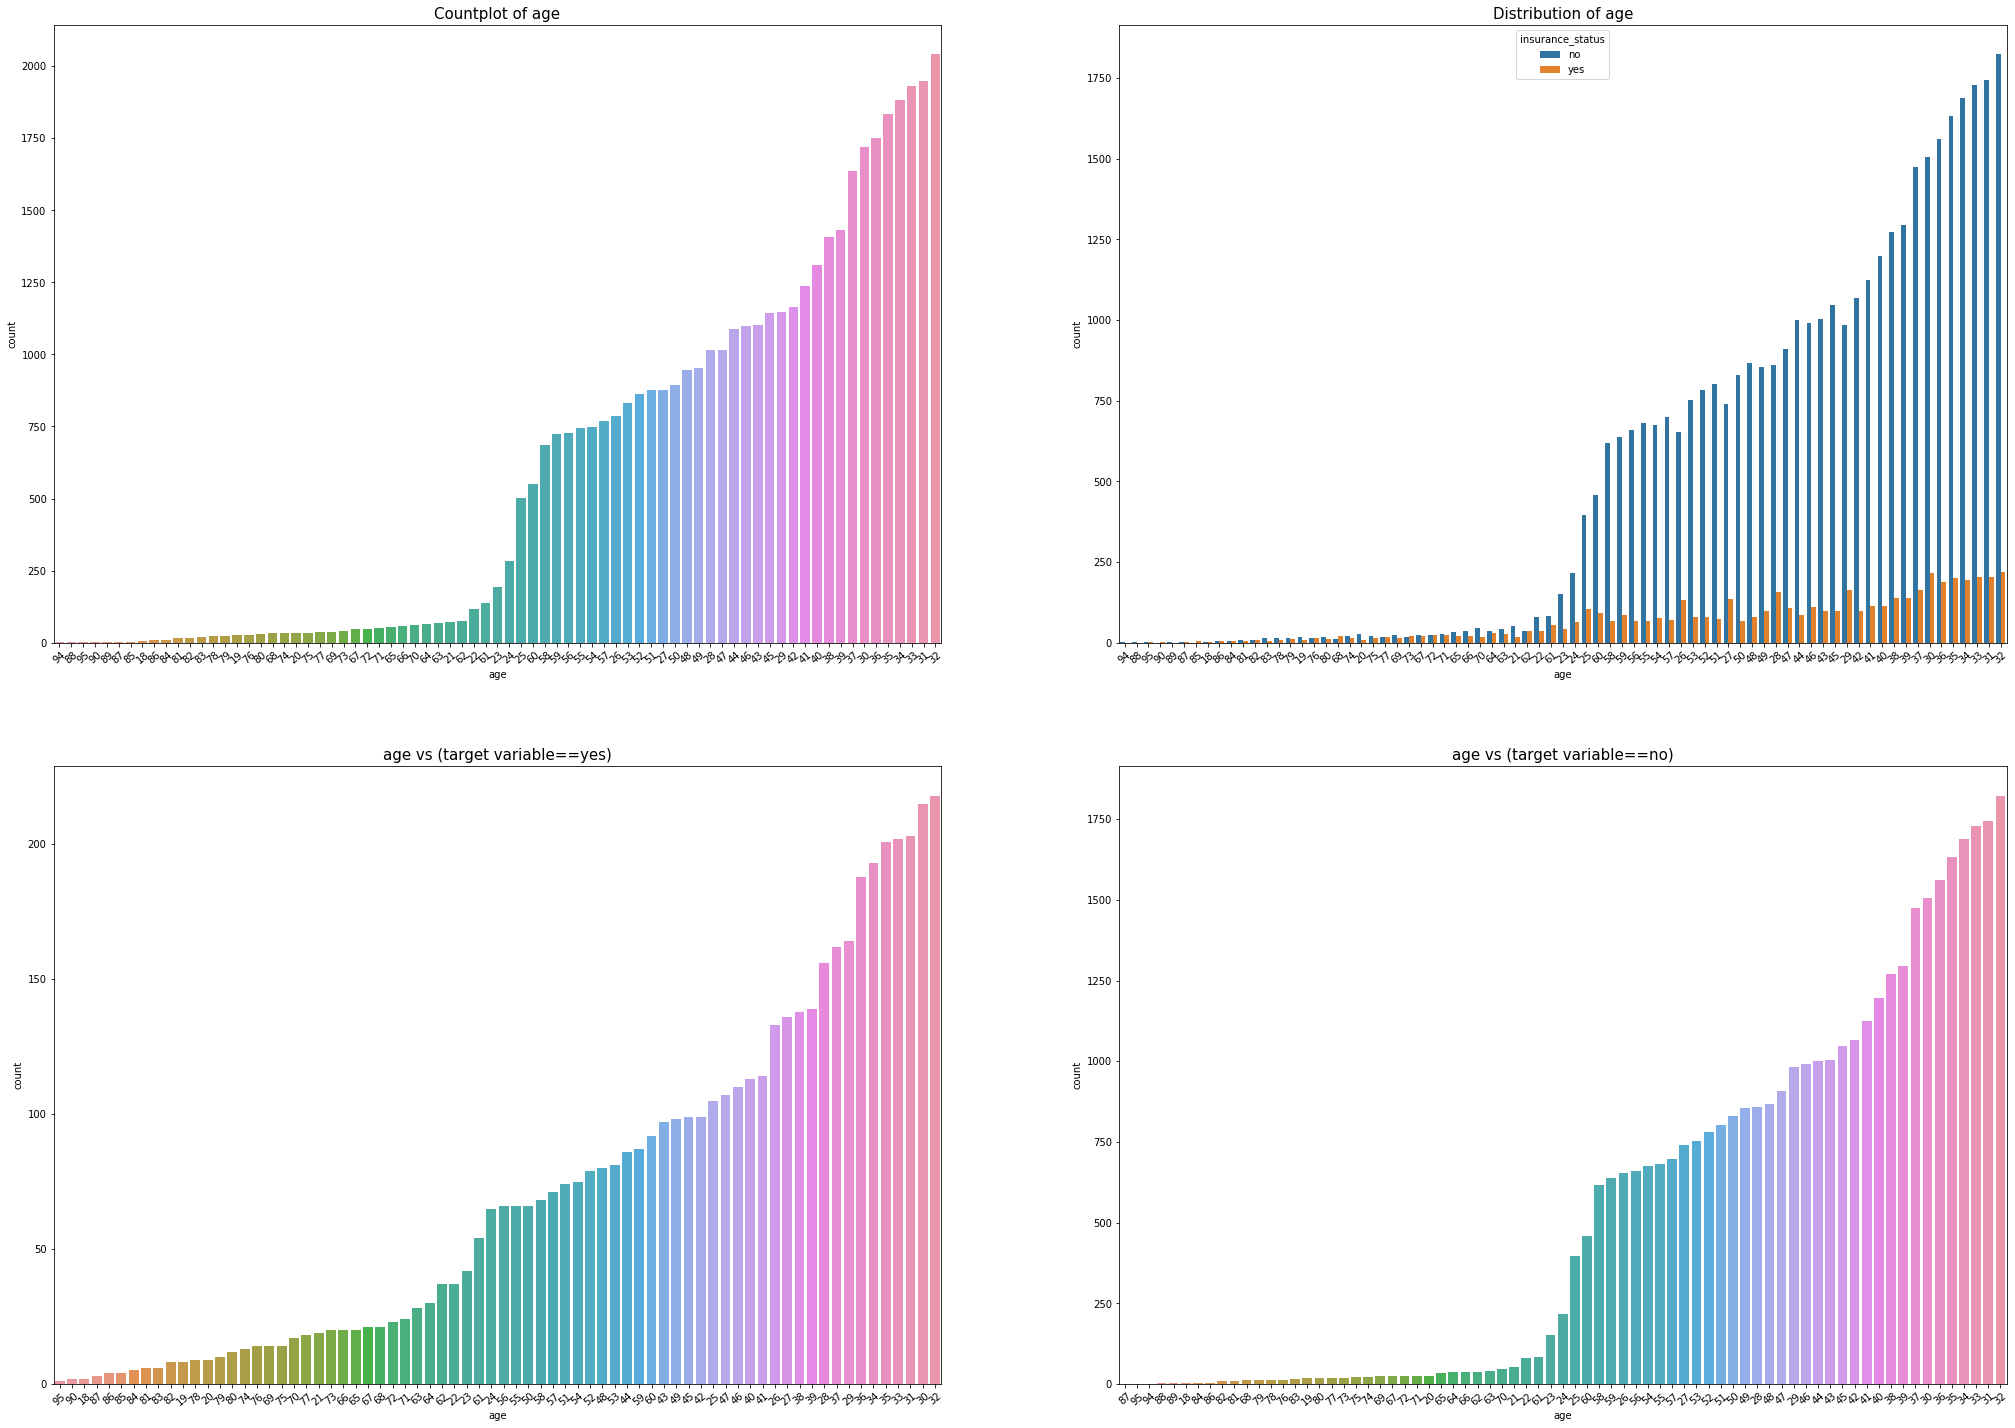

In [ ]:
plt.figure(figsize=(35,25))
feature("age")

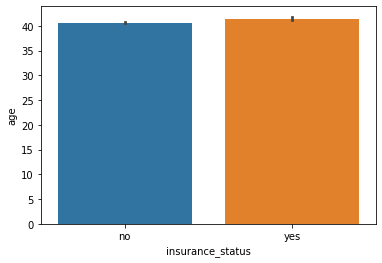

In [ ]:
sns.barplot(y='age',x='insurance_status',data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


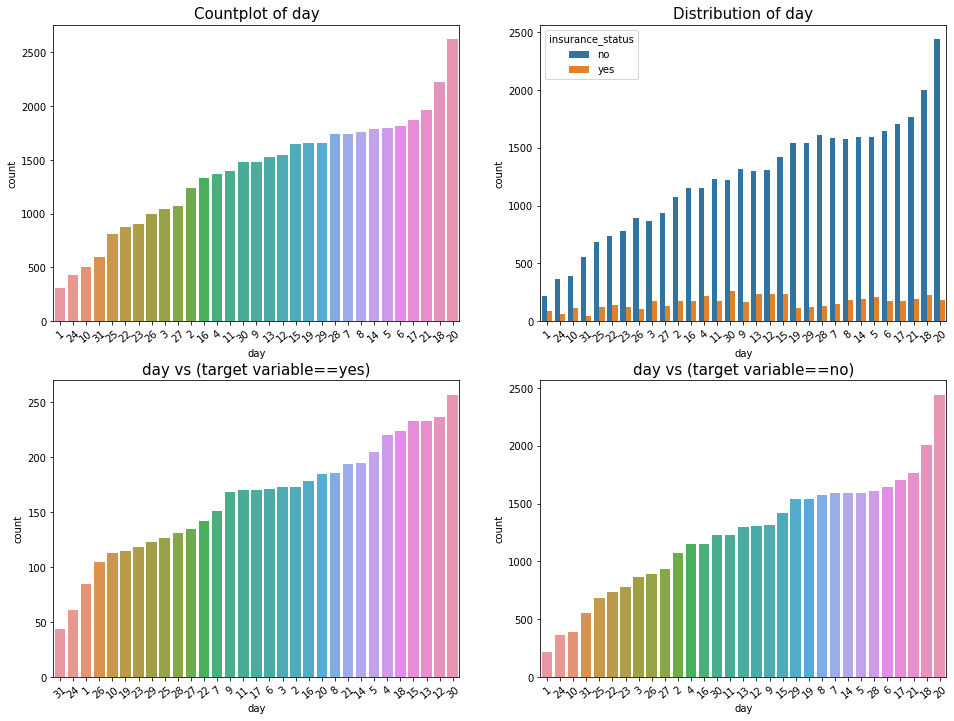

In [ ]:
plt.figure(figsize=(16,12))
feature("day")

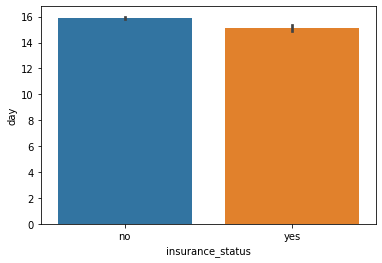

In [ ]:
sns.barplot(y='day',x='insurance_status',data=df)

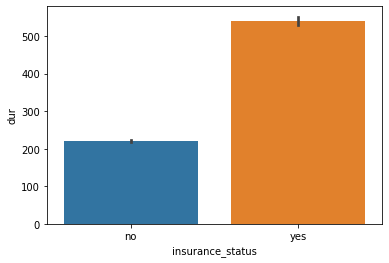

In [ ]:
sns.barplot(y='dur',x='insurance_status',data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


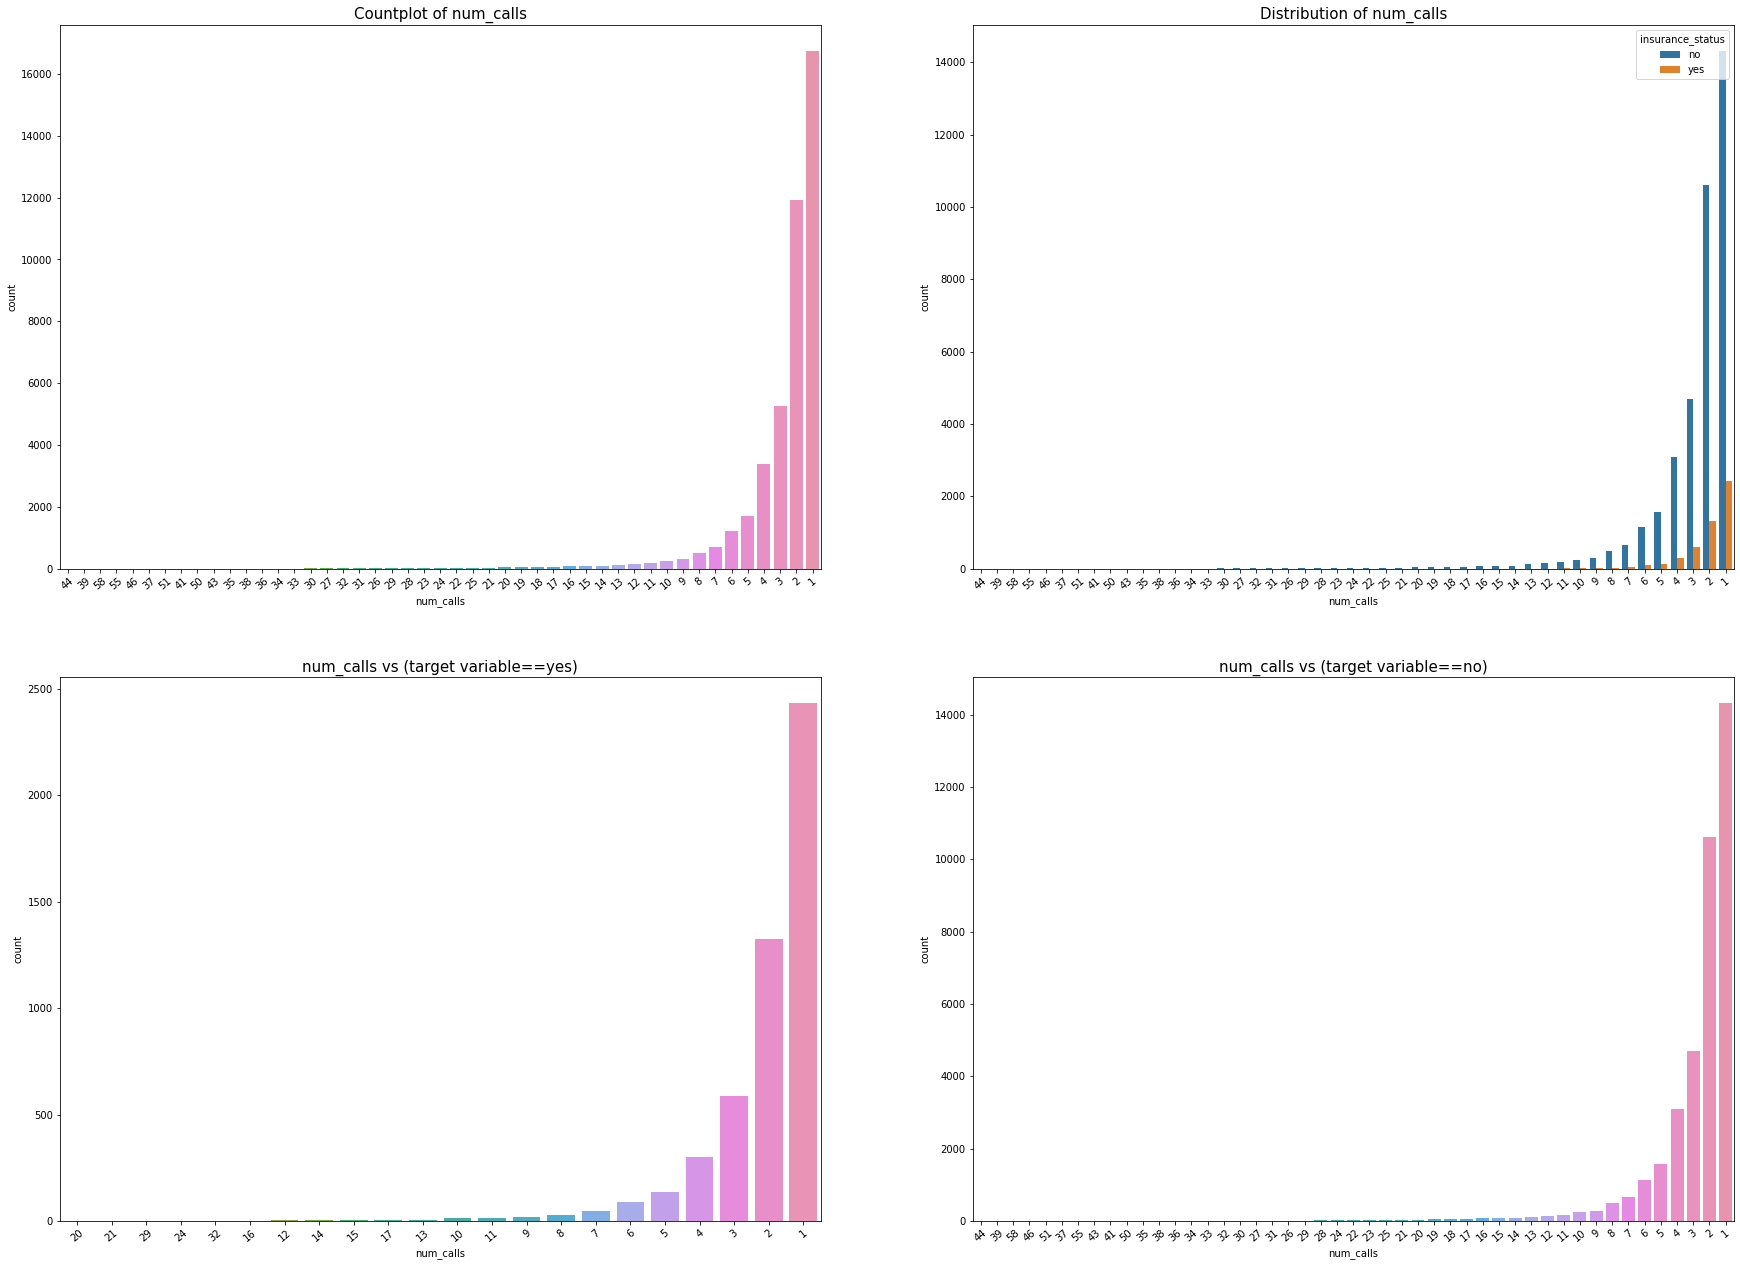

In [ ]:
plt.figure(figsize=(30,22))
feature("num_calls")

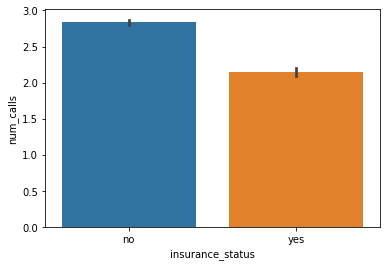

In [ ]:
sns.barplot(y='num_calls',x='insurance_status',data=df)

# **Encoding**

In [ ]:
df['insurance_status'] = df['insurance_status'].map({'yes':1,'no':0})

In [ ]:
df['insurance_status'].value_counts()

0    38166
1     5021
Name: insurance_status, dtype: int64

In [ ]:
df.marital = df.marital.map({'divorced':1, 'single':2, 'married':3})
df.education_qual = df.education_qual.map({'primary':1, 'tertiary':2, 'secondary':3})
df.mon = df.mon.map({'dec': 1, 'jan': 2, 'mar' : 3, 'sep' : 4, 'oct' : 5, 'nov' : 6, 'feb' : 7, 'jun' : 8, 'apr' : 9, 'jul' : 10, 'aug' : 11, 'may' :12})

In [ ]:
df=pd.get_dummies(df,columns=["job"],prefix='job')

In [ ]:
df.dtypes

age                  int64
marital              int64
education_qual       int64
day                  int64
mon                  int64
dur                  int64
num_calls            int64
insurance_status     int64
job_admin            uint8
job_blue-collar      uint8
job_entrepreneur     uint8
job_housemaid        uint8
job_management       uint8
job_retired          uint8
job_self-employed    uint8
job_services         uint8
job_student          uint8
job_technician       uint8
job_unemployed       uint8
dtype: object

# **Data preparation and splitting**

In [ ]:
X = df.drop(['insurance_status'],axis=1)
y = df['insurance_status']

In [ ]:
print(f"Independent features has {X.shape[0]} rows and {X.shape[1]} columns")
print(f"Dependent features has {y.shape[0]} rows and 1 column")

Independent features has 43187 rows and 18 columns
Dependent features has 43187 rows and 1 column


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print("The shape of X train:", X_train.shape)
print("The shape of X test:", X_test.shape)
print("The shape of y train:", y_train.shape)
print("The shape of y test:", y_test.shape)

The shape of X train: (34549, 18)
The shape of X test: (8638, 18)
The shape of y train: (34549,)
The shape of y test: (8638,)


In [ ]:
y_train.value_counts()

0    30541
1     4008
Name: insurance_status, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialising
scaler.fit(X_train) # finds the values of mu and sigma
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) #only transform the test dataset, dont fit it

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler # From imblearn pkg , from under_sampling module, importting RandomUnderSampler class.

rus = RandomUnderSampler() #Intialise the model
X_rus, y_rus = rus.fit_resample(X_train, y_train) #resampling the data ## Decreases the major class # balances data

In [ ]:
print("classes distribution after undersampling")
print(y_rus.value_counts())
print("----------------------------------------------------")
print("classes distribution before undersampling")
print(y_train.value_counts())

classes distribution after undersampling
0    4008
1    4008
Name: insurance_status, dtype: int64
----------------------------------------------------
classes distribution before undersampling
0    30541
1     4008
Name: insurance_status, dtype: int64


In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler() #Initialis the model 
X_ros, y_ros = ros.fit_resample(X_train, y_train) #Fit the model # increases the majority class

In [ ]:
print("classes distribution after oversampling")
print(y_ros.value_counts())
print("----------------------------------------------------")
print("classes distribution before oversampling")
print(y_train.value_counts())

classes distribution after oversampling
0    30541
1    30541
Name: insurance_status, dtype: int64
----------------------------------------------------
classes distribution before oversampling
0    30541
1     4008
Name: insurance_status, dtype: int64


In [ ]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')#startegy = all, increase minority datapoints decrease majority data points, do under & over sampling
X_smt, y_smt = smt.fit_resample(X_train_scaled, y_train)

In [ ]:
X_smt.shape

(52064, 18)

In [ ]:
y_smt.value_counts()

1    28357
0    23707
Name: insurance_status, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


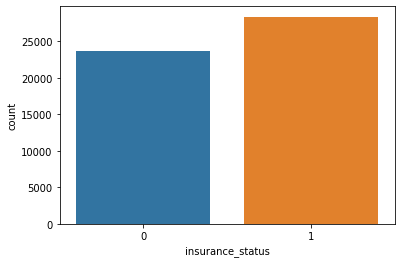

In [ ]:
sns.countplot(y_smt)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_smt,y_smt) #train model on balanced data
#print( "AUROC on the sampled dataset : ",roc_auc_score(y_test, lr.predict_proba(X)[:, 1]))

LogisticRegression()

In [ ]:
y_pred=lr.predict(X_test_scaled)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.tail()

,Actual,Predicted
23165,0,1
21948,0,0
40604,0,1
15435,0,0
2814,0,0


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve, confusion_matrix,f1_score
print(f1_score(y_test,y_pred))

0.42568431823995906


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


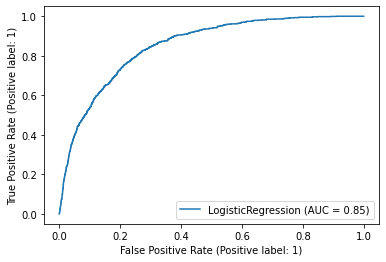

In [ ]:
plot_roc_curve(lr, X_test_scaled, y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_smt,y_smt) # training the model
  print("K value  : " , i, " train score : ", knn.score(X_smt,y_smt) , " score : ", np.mean(cross_val_score(knn, X_smt, y_smt, cv=10)))

K value  :  1  train score :  1.0  score :  0.9966387043181404
K value  :  2  train score :  0.9998079287031346  score :  0.9962737703264637
K value  :  3  train score :  0.9977527658266748  score :  0.9894552761173399
K value  :  4  train score :  0.9974070374923172  score :  0.9891095617981083
K value  :  5  train score :  0.9923555623847572  score :  0.9803127250979632
K value  :  6  train score :  0.9925476336816226  score :  0.9798517591460003
K value  :  7  train score :  0.985479409956976  score :  0.9713430736616633
K value  :  8  train score :  0.9853257529194838  score :  0.9706323958387824
K value  :  9  train score :  0.9778157652120467  score :  0.9635257541028469
K value  :  10  train score :  0.9777389366933006  score :  0.9628919660367361
K value  :  20  train score :  0.9480831284572834  score :  0.9351761949637669
K value  :  50  train score :  0.9088045482483098  score :  0.8988362064099858


In [ ]:
knn = KNeighborsClassifier(1) # at k=1 we got best cross val score(Average of evaluation metric)
knn.fit(X_smt,y_smt)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred=knn.predict(X_test_scaled)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.tail()

,Actual,Predicted
23165,0,0
21948,0,0
40604,0,0
15435,0,0
2814,0,0


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


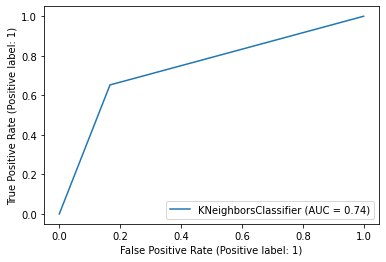

In [ ]:
plot_roc_curve(knn, X_test_scaled, y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
for depth in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]:
  dt = DecisionTreeClassifier(max_depth=depth) 
  dt.fit(X_smt, y_smt) 
  trainAccuracy = accuracy_score(y_smt, dt.predict(X_smt)) 
  dt = DecisionTreeClassifier(max_depth=depth) 
  valAccuracy = cross_val_score(dt, X_smt, y_smt, cv=10) 
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7772741241548863  Cross val score :  0.7756032450185081
Depth  :  2  Training Accuracy :  0.7772741241548863  Cross val score :  0.7862626671844051
Depth  :  3  Training Accuracy :  0.8319376152427781  Cross val score :  0.8331670456618839
Depth  :  4  Training Accuracy :  0.8344729563614014  Cross val score :  0.8397357800431333
Depth  :  5  Training Accuracy :  0.8498770743700061  Cross val score :  0.8490322101789598
Depth  :  6  Training Accuracy :  0.8719460663798402  Cross val score :  0.8668569217492248
Depth  :  7  Training Accuracy :  0.8865434849416103  Cross val score :  0.8800907581707034
Depth  :  8  Training Accuracy :  0.897030577750461  Cross val score :  0.892555992144208
Depth  :  9  Training Accuracy :  0.9111286109403811  Cross val score :  0.9004118322058409
Depth  :  10  Training Accuracy :  0.9221535033804549  Cross val score :  0.9111871884688456
Depth  :  11  Training Accuracy :  0.933869852489244  Cross val score :  0.919695

In [ ]:
dt = DecisionTreeClassifier(max_depth=24) # Instantiate model # max depth = log2 18 is 4.16.i.e, 4 # To control overfitting
dt.fit(X_smt, y_smt)


DecisionTreeClassifier(max_depth=24)

In [ ]:
y_pred = dt.predict(X_test_scaled)
y_pred

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
3752,0,0
11896,0,1
25769,0,0
38253,1,0
14750,0,0


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


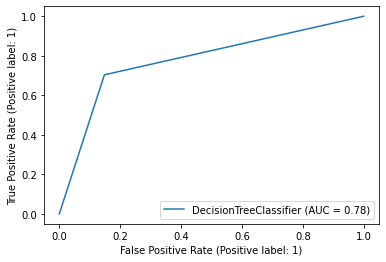

In [ ]:
plot_roc_curve(dt, X_test_scaled, y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate model # max depth = log2 18 is 4.16.i.e, 4 fearures = sqrt(18) # To control overfitting
rf = RandomForestClassifier(n_estimators= 100, max_depth = 4, max_features='sqrt')
rf.fit(X_smt,y_smt)

RandomForestClassifier(max_depth=4, max_features='sqrt')

In [ ]:
y_pred = rf.predict(X_test_scaled)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
3752,0,0
11896,0,0
25769,0,1
38253,1,1
14750,0,0


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


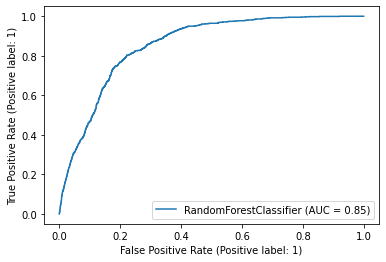

In [ ]:
plot_roc_curve(rf, X_test_scaled, y_test)

In [ ]:
import xgboost as xgb
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,0.75,0.8,0.9,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_smt,y_smt) #train the model
  print("Learning rate : ", lr, " Train score : ", model.score(X_smt,y_smt), " Cross-Val score : ", np.mean(cross_val_score(model, X_smt, y_smt, cv=10)))

Learning rate :  0.01  Train score :  0.8453826060233559  Cross-Val score :  0.8446340371471631
Learning rate :  0.03  Train score :  0.8839121081745543  Cross-Val score :  0.8805321576845377
Learning rate :  0.04  Train score :  0.8998732329440688  Cross-Val score :  0.8958212927557476
Learning rate :  0.05  Train score :  0.9089197910264291  Cross-Val score :  0.90452209380661
Learning rate :  0.06  Train score :  0.9139136447449293  Cross-Val score :  0.9110718040322355
Learning rate :  0.07  Train score :  0.9193492624462201  Cross-Val score :  0.915124672223427
Learning rate :  0.08  Train score :  0.9245159803318992  Cross-Val score :  0.9218855443051813
Learning rate :  0.09  Train score :  0.9287991702519975  Cross-Val score :  0.9254966625278582
Learning rate :  0.1  Train score :  0.9341963736939152  Cross-Val score :  0.9300488622359703
Learning rate :  0.11  Train score :  0.9358289797172711  Cross-Val score :  0.9337367779905017
Learning rate :  0.12  Train score :  0.9403

In [ ]:
model = xgb.XGBClassifier(learning_rate = 0.7, n_estimators=100)
model.fit(X_smt,y_smt) #train the model

XGBClassifier(learning_rate=0.7)

In [ ]:
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
3752,0,0
11896,0,0
25769,0,0
38253,1,0
14750,0,0


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


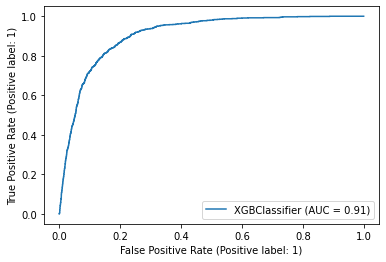

In [ ]:
plot_roc_curve(model, X_test_scaled, y_test)

In [ ]:
rf.feature_importances_

array([7.53635514e-02, 1.68077973e-02, 1.59563787e-02, 2.51690930e-02,
       1.69961247e-01, 5.54722009e-01, 9.89419347e-02, 3.32085007e-04,
       2.18480035e-02, 2.23624406e-04, 4.04803465e-04, 3.92550549e-03,
       8.15637375e-03, 5.85599667e-05, 1.51109757e-03, 6.22429348e-03,
       1.12874575e-04, 2.80767279e-04])

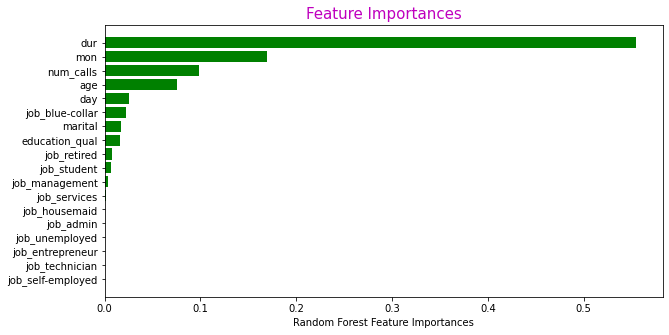

In [ ]:
sorted_idx = rf.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx], color="green")
plt.xlabel("Random Forest Feature Importances")
plt.title("Feature Importances",color='m',size=15)
plt.show()

In [ ]:
model.feature_importances_

array([0.02750216, 0.03369534, 0.06005539, 0.03115811, 0.10875834,
       0.25825414, 0.1329672 , 0.01359846, 0.13540587, 0.01968686,
       0.00847908, 0.00831275, 0.00469357, 0.00976745, 0.01580934,
       0.11498673, 0.00855186, 0.0083173 ], dtype=float32)

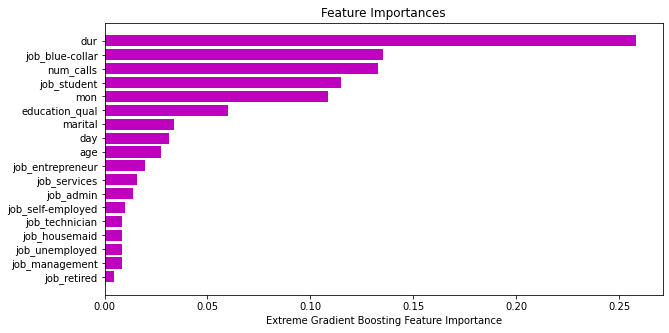

In [ ]:
sorted_idx = model.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(X.columns[sorted_idx], model.feature_importances_[sorted_idx], color="m")
plt.xlabel("Extreme Gradient Boosting Feature Importance")
plt.title("Feature Importances")
plt.show()